In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
%matplotlib inline 

In [3]:
# se conectando com os dados - Nesse caso, a fonte de dados é um arquivo
dataset = pd.read_csv('risco.csv')

In [4]:
# Imprime na tela os primeiros registros
dataset.head(6)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
5,5,5.4,3.9,1.7,0.4,Risco_Alto


In [5]:
#Informações do Dataset - Tipo de variáveis, quantidade de linhas(registros) e colunas (variáveis/features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Verifica as dimenções do dataset(antes  de virgula são linhas, depois da virgula são colunas)
dataset.shape

(150, 6)

In [7]:
# Estatísitcas descritivas das variáveis numericas 
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Tabela de Frequências de variável "risco" - Nossa Classe ou Label ou Target
dataset['Risco'].value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

In [9]:
# Forma adicional de criar a Tab. de Frequência
dataset.Risco.value_counts()

Risco_Medio    50
Risco_Alto     50
Risco_Baixo    50
Name: Risco, dtype: int64

<AxesSubplot:xlabel='Risco', ylabel='count'>

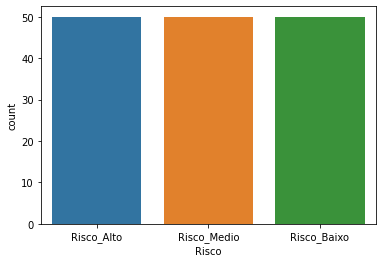

In [10]:
# Cria um gráfico de barras da variável target 
sns.countplot(dataset['Risco'])

In [11]:
# Check for missing values 
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [12]:
# Printa o dataset na tela
dataset

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo


id_cliente            AxesSubplot(0.125,0.536818;0.227941x0.343182)
anot_cadastrais    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
indice_inad        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
class_renda              AxesSubplot(0.125,0.125;0.227941x0.343182)
saldo_contas          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

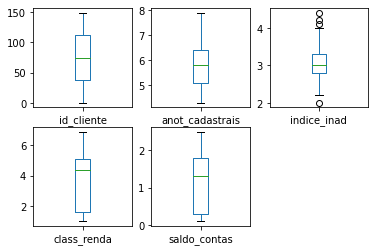

In [13]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots='True', layout=(2, 3), sharex=False, sharey=False)